In [1]:
import cameratransform as ct
import drawSvg as draw
from math import sin, cos, pi, asin, inf
import numpy as np
import random
from opensimplex import OpenSimplex

In [2]:
def const(skew):
    while True:
        yield skew

def sinusoidal(amp = 1.02, period=1000, base=1):
    theta = 0
    while True:
        val = sin(theta) + 1
        val = base + val/2 * (amp-1)
        yield val
        theta += 2*pi/period
        
gen = OpenSimplex(seed=123)
default_cam = ct.Camera(ct.RectilinearProjection(image=(1000, 1000)),
                        ct.SpatialOrientation(pos_y_m=-4000, elevation_m=-1800, tilt_deg=120, roll_deg=180))
def dome(start_r=0, height=1200, n=360, zstep=4,rofz=lambda z: z/3,h=360, noise_coeff=.1, noise_r=3, 
         noise_coeff2=0, noise_r2=30, cam=default_cam, theta_skew = const(1.1), swap_every=0, offset=0,seed=123):
    random.seed(seed)
    gen = OpenSimplex(seed=seed)
    canvas = draw.Drawing(1000, 1000, center='origin', displayInline=False)
    canvas.append(draw.Rectangle(0, 0, 1000, 1000, fill='black'))
    line = []
    
    
    noise_coords = [(noise_r * cos(theta), noise_r * sin(theta)) for theta in np.arange(0, 2*pi, 2*pi/n)]
    stuff = []
    for i, xy in enumerate(noise_coords):
        x,y = xy
        noise = gen.noise2d(x,y)
        theta = i/n*2*pi
        r = 1 + noise_coeff * noise + offset * sin(theta)
        x2,y2 = noise_r2*cos(theta),noise_r2*sin(theta)
        r += noise_coeff2 * gen.noise2d(x2, y2) * noise
        stuff.append((r,theta))
    r = start_r
    z = 0
    dz = zstep / n
    i = 0
    theta = pi
    running = 0

    while z < height:
        x = cos(theta) * stuff[i][0] * r
        y = sin(theta) * stuff[i][0] * r
        line.append((x,y,z-80))
        thew = next(theta_skew)
        if swap_every and (running // swap_every) % 2:
            thew = 1 / thew
        theta += 2*pi/n * thew
        r = rofz(z)
        z += dz
        i = (i + 1) % n
        running += 1
    
    
    line = cam.imageFromSpace(line).flatten()
    canvas.append(draw.Lines(*line, close=False, fill='none', stroke='#fff'))
    canvas.setPixelScale(.4)
    display(canvas.rasterize())
    

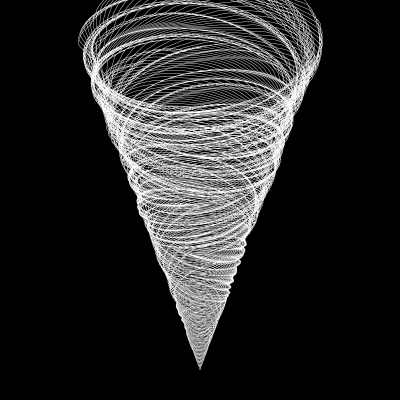

In [3]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*60)

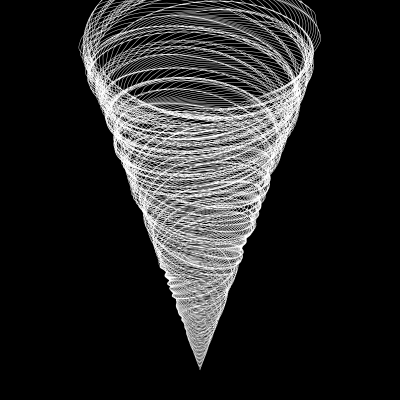

In [4]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90)

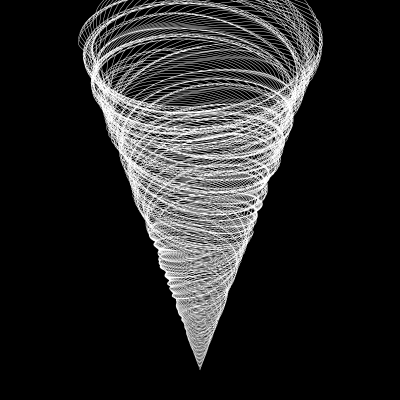

In [5]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*120)

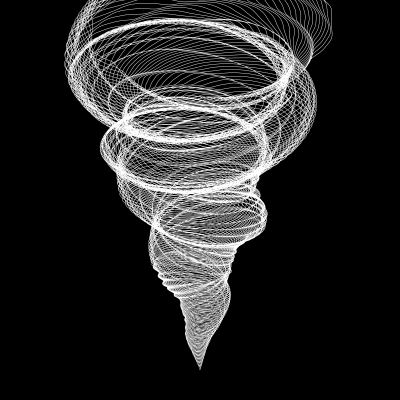

In [6]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.2)

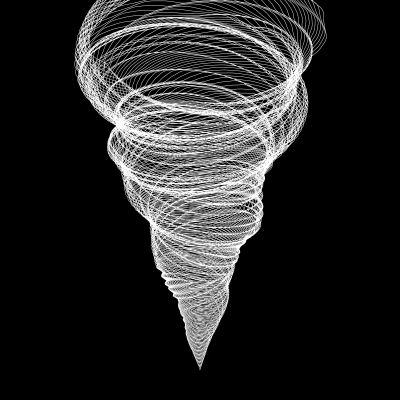

In [7]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.1)

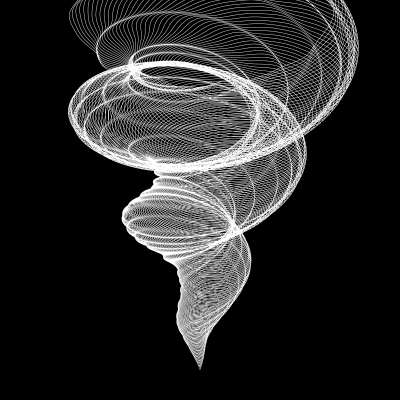

In [8]:
dome(theta_skew=const(1.01), offset=0.4)

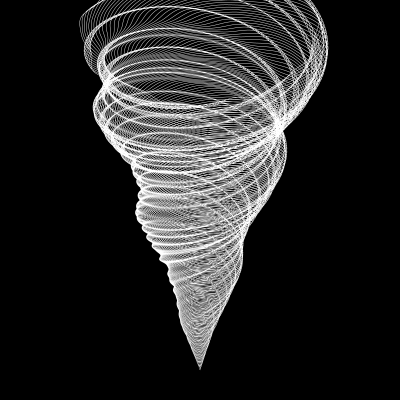

In [9]:
dome(theta_skew=const(1.01), offset=0.1)

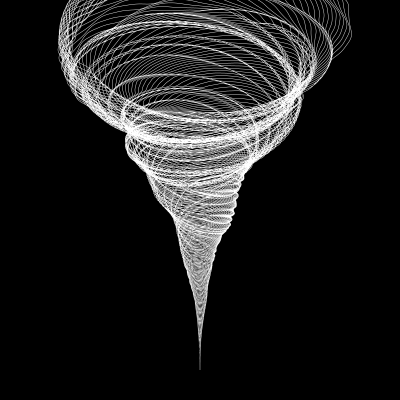

In [10]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.1,rofz=lambda z: z**2/1000/3)

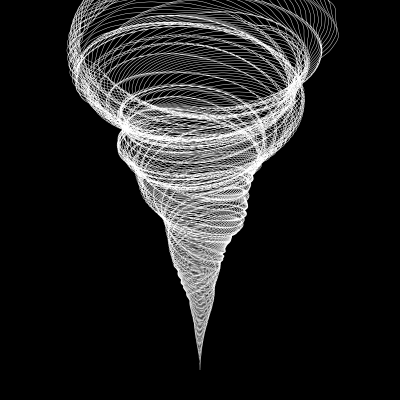

In [11]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.1,rofz=lambda z: z**1.5/(1000**.5)/3)

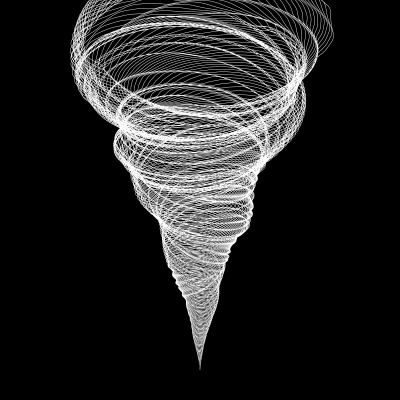

In [12]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.1,rofz=lambda z: z**1.3/(1000**.3)/3)

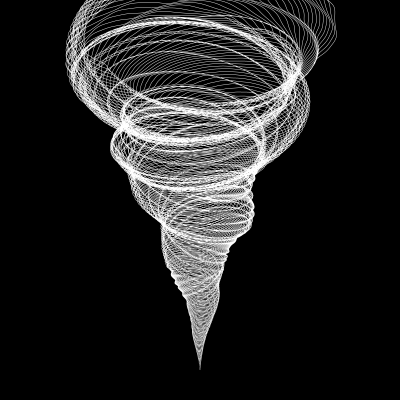

In [13]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6, swap_every=360*90,offset=0.15,rofz=lambda z: z**1.3/(1000**.3)/3)

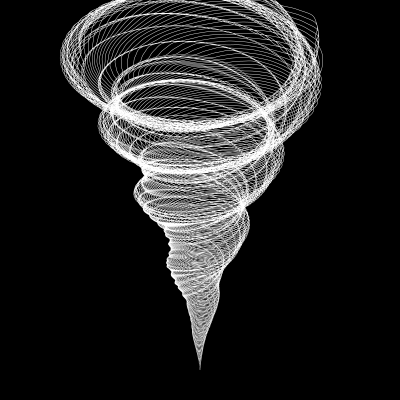

In [14]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, noise_r2=6,offset=0.15,rofz=lambda z: z**1.3/(1000**.3)/3)

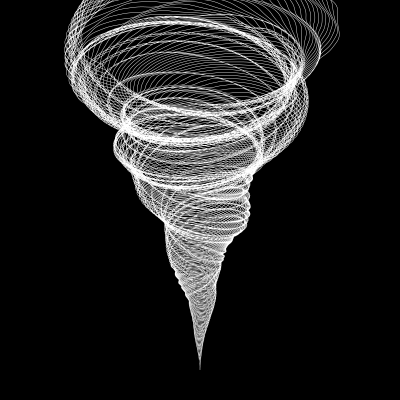

In [15]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, swap_every=360*90, noise_r2=6,offset=0.143,rofz=lambda z: z**1.43/(1000**.43)/3)

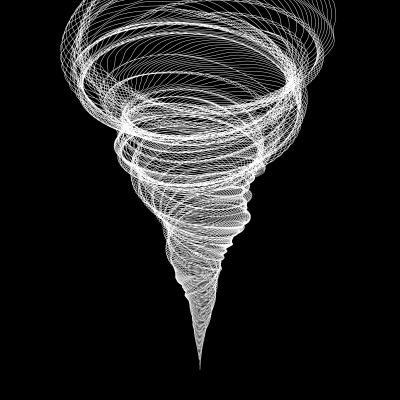

In [16]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, swap_every=360*90, noise_r2=6,offset=0.143,rofz=lambda z: z**1.43/(1000**.43)/3, seed=101)

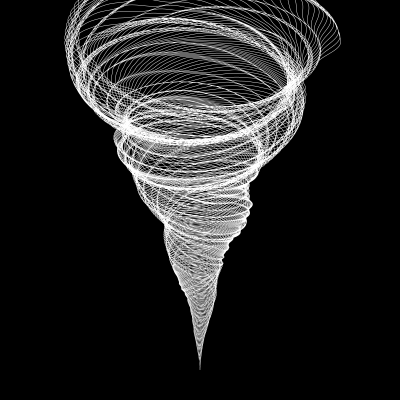

In [17]:
dome(theta_skew=sinusoidal(1.01, 360*30, base=1.01), noise_coeff2=.05, swap_every=360*90, noise_r2=6,offset=0.143,rofz=lambda z: z**1.43/(1000**.43)/3, seed=186)